In [364]:
!pip3 install kaggle

In [448]:
!kaggle datasets download -d teajay/global-shark-attacks

100%|████████████████████████████████████████| 548k/548k [00:00<00:00, 2.00MB/s]
100%|████████████████████████████████████████| 548k/548k [00:00<00:00, 1.98MB/s]


In [449]:
!tar -xzvf global-shark-attacks.zip

x attacks.csv


In [450]:
!mv attacks.csv ../Data/attacks.csv

mv: rename attacks.csv to ../Data/attacks.csv: No such file or directory


In [451]:
import pandas as pd
import os
import numpy as np

In [80]:
pwd

'/Users/mariana/data-cleaning-pandas'

In [64]:
print(os.getcwd())

/Users/mariana/data-cleaning-pandas


In [699]:
print(os.listdir(os.getcwd()))

['.DS_Store', 'shark-clean.csv', 'sharks-clean.zip', 'shark_clean.zip', 'attacks.csv', 'README.md', '.gitignore', 'out.zip', 'global-shark-attacks.zip', '.ipynb_checkpoints', '.git', 'Data', 'Data Cleaning.ipynb', 'Analysis.ipynb']


In [700]:
df_original = pd.read_csv('attacks.csv',encoding='cp1252')
df = df_original.copy()

In [701]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [702]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [703]:
print(df.shape)
print(df.dtypes)

(25723, 24)
Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object


In [704]:
null_cols = df.isnull().sum()
null_cols

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [705]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Case Number - 66%
Date - 76%
Year - 76%
Type - 76%
Country - 76%
Area - 77%
Location - 78%
Activity - 78%
Name - 76%
Sex  - 78%
Age - 87%
Injury - 76%
Fatal (Y/N) - 78%
Time - 89%
Species  - 87%
Investigator or Source - 76%
pdf - 76%
href formula - 76%
href - 76%
Case Number.1 - 76%
Case Number.2 - 76%
original order - 75%
Unnamed: 22 - 100%
Unnamed: 23 - 100%


In [706]:
df.drop(['Investigator or Source', 'href', 'pdf', 'Case Number.1', 'Case Number.2', 'href formula', 'original order', 'Unnamed: 22', 'Unnamed: 23', 'Case Number'], axis=1)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [707]:
df.Country.value_counts(dropna=True)

USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
                    ... 
AFRICA                 1
SAN DOMINGO            1
NEVIS                  1
SUDAN?                 1
JAVA                   1
Name: Country, Length: 212, dtype: int64

In [708]:
df.rename(columns={'Sex ': 'Sex'}, inplace=True)
df.columns = df.columns.str.strip()

In [709]:
set(df['Sex'])

{'.', 'F', 'M', 'M ', 'N', 'lli', nan}

In [710]:
data['Sex'] = df['Sex'].str.replace('N', 'M')
data['Sex'] = df['Sex'].str.strip()
data['Sex'] = df['Sex'].fillna('Unknown')
data['Sex'] = df['Sex'].str.replace('lli', 'Unknown')
data['Sex'] = df['Sex'].str.replace('.', 'Unknown')
set(data['Sex'])
data['Sex'].value_counts(dropna=True)

M          5058
F           633
N             2
M             2
lli           1
Unknown       1
Name: Sex, dtype: int64

In [711]:
set(df['Fatal (Y/N)'])

{' N', '2017', 'M', 'N', 'N ', 'UNKNOWN', 'Y', nan, 'y'}

In [712]:
data['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.strip()
data['Fatal (Y/N)'] = df['Fatal (Y/N)'].fillna('U')
data['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('n', 'N')
data['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('#VALUE!', 'U')
data['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('F', 'Y')
data['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('UNKNOWN', 'U')
data.rename(columns={'Fatal (Y/N)': 'Fatal (Y/N/U)'}, inplace=True)
print(set(data['Fatal (Y/N/U)']))

{'Fatal (Y/N/U)'}


In [740]:
df['Fatal (Y/N)'].describe()
df['Fatal (Y/N)'].value_counts()

N          1840
Y           368
 N            3
UNKNOWN       3
Name: Fatal (Y/N), dtype: int64

<AxesSubplot:title={'center':'Was the attack fatal?'}>

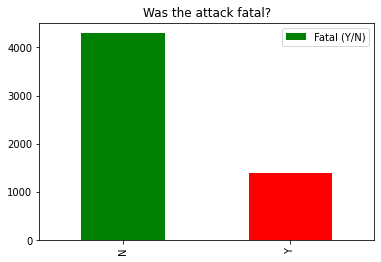

In [713]:
df[df['Fatal (Y/N)'].isin(['Y','N'])]["Fatal (Y/N)"].value_counts()\
.plot(kind='bar', title= "Was the attack fatal?",legend = True, color= ['green','red'])

In [714]:
df['Date']=df['Date'].apply(str)
month_lst = []
for row in df['Date']:
    month_row = ''.join(re.findall('\-[A-Za-z]{3}\-',row)).lower()
    month_row = re.sub('\-','',month_row)
        
        
    if month_row == '':
        month_row = np.nan

    month_lst.append(month_row)

df['month'] = month_lst

In [715]:
df.dropna(subset=['month'], inplace=True)
for row in df['month']:
    if len(row) > 3:
        df['month'].replace(row,row[:3], inplace=True)
    elif row == 'jut':
        df['month'].replace(row,'jun', inplace=True)
df['month'].value_counts(dropna=False)

jul    621
aug    556
sep    521
jan    494
jun    475
apr    420
oct    417
dec    415
mar    381
nov    378
may    358
feb    356
Name: month, dtype: int64

In [716]:
df.drop(df[df['Time'] == 'NaN'].index, inplace = True)

In [717]:
df.Time.value_counts()

Afternoon           178
11h00               119
Morning             114
15h00               106
12h00               103
                   ... 
Just after 12h00      1
13h35                 1
11h56                 1
16h25                 1
01h32                 1
Name: Time, Length: 359, dtype: int64

In [718]:
df['Clean_Hours'] = df['Time'].str.extract("([0-9]+)", expand=False).dropna().astype(int)
df['Clean_Hours']= df[df['Clean_Hours']<25]['Clean_Hours']
df.drop(dfn[dfn['Clean_Hours'] == 'NaN'].index, inplace = True)
df['Clean_Hours'].value_counts(dropna=True)

11.0    248
16.0    236
15.0    235
14.0    234
12.0    197
13.0    195
17.0    192
10.0    178
18.0    129
9.0     124
8.0      92
7.0      81
19.0     53
6.0      38
20.0     29
5.0      10
3.0      10
2.0       8
23.0      8
22.0      5
4.0       5
1.0       5
21.0      5
0.0       1
Name: Clean_Hours, dtype: int64

need to group data in order to be able to check max and min of time

In [731]:
conditions = [(df['Clean_Hours'] > 0.0) & (df['Clean_Hours'] <= 6.0),
    (df['Clean_Hours'] > 6.0) & (df['Clean_Hours'] <= 12.0),
    (df['Clean_Hours'] > 12.0) & (df['Clean_Hours'] <= 18.0),
    (df['Clean_Hours'] > 18.0) & (df['Clean_Hours'] <= 23.0)]

# create a list of the values we want to assign for each condition
values = ['Night', 'Morning', 'Afternoon', 'Evening']

# create a new column and use np.select to assign values to it using our lists as arguments
df['sessions'] = np.select(conditions, values)
df.drop(df[df['sessions'] == 'NaN'].index, inplace = True)
df['sessions'].value_counts()
df.drop(df[df['sessions'] == '0'].index, inplace = True)
df['sessions'].value_counts()

Afternoon    1182
Morning       874
Evening        89
Night          69
Name: sessions, dtype: int64

In [720]:
df.Type.value_counts()

Unprovoked      3941
Provoked         501
Invalid          469
Sea Disaster     195
Boating          171
Boat             108
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [721]:
df.drop(df[df['Type'] == 'Invalid'].index, inplace = True)

In [724]:
df.drop(['Investigator or Source', 'href', 'pdf', 'Case Number.1', 'Case Number.2', 'href formula', 'original order', 'Unnamed: 22', 'Unnamed: 23', 'Case Number'], axis=1)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,month,Clean_Hours,sessions
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,jun,18.0,Afternoon
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,jun,14.0,Afternoon
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,jun,NaN,0
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",jun,NaN,0
5,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris …,M,NaN,"No injury, board bitten",N,NaN,NaN,jun,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,"No date, Before 8-May-1965",0.0,Unprovoked,GREECE,Island of Volos,Eastern shore,Swimming,woman,F,NaN,FATAL,Y,NaN,NaN,may,NaN,0
6245,Before 19-Jun-1959,0.0,Unprovoked,USA,California,"Capistrano, Orange County",NaN,girl,F,NaN,Leg injured,N,NaN,"White shark, 1,900-lb",jun,NaN,0
6288,Before 17-Jul-1916,0.0,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,NaN,"""Lost leg""",N,NaN,NaN,jul,NaN,0
6289,No date (3 days after preceding incident) & pr...,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Fishing,a native fisherman,M,NaN,"FATAL, body not recovered but shark was caught...",Y,NaN,NaN,jul,NaN,0


In [727]:
compression_opts = dict(method='zip', archive_name='sharks-clean2.csv')  
df.to_csv('sharks-clean2.zip', index=False, compression=compression_opts)

In [728]:
!tar -xzvf sharks-clean2.zip

x sharks-clean2.csv
